In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os
import numpy as np
import glob
import scipy
import seaborn

In [2]:
# uni = "20221207_jade_charge_test_homo2_cf"
uni = "20230116_fea1_maxpool_aggrmax_ly5_cl3_k5_cf"
geo = 1 ## 1 jsns2 / 2 cylinder / 3 sphere

path = "/users/yewzzang/work/JSNS2_vertex/result/"+uni +"/"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [3]:
path

'/users/yewzzang/work/JSNS2_vertex/result/20230116_fea1_maxpool_aggrmax_ly5_cl3_k5_cf/20230116_fea1_maxpool_aggrmax_ly5_cl3_k5_cf.csv'

In [4]:
df = pd.read_csv(pred_list[0])

In [5]:
pred = np.array(df['prediction']).reshape(-1,4)
pred

array([[-1.66703299e-01,  1.15944445e-03, -8.81588817e-01,
         9.25963306e+00],
       [ 1.47196814e-01,  1.33000761e-02,  4.42917138e-01,
         8.68444061e+00],
       [ 2.59818316e-01, -3.99114341e-02,  4.43833143e-01,
         9.74257278e+00],
       ...,
       [ 3.79406661e-02,  1.50500000e-01,  7.91514993e-01,
         8.89467335e+00],
       [-1.60910353e-01, -2.66710371e-01, -8.46500516e-01,
         8.10918903e+00],
       [ 7.32847601e-02,  2.40400627e-01,  1.77205622e-01,
         8.69274902e+00]])

In [6]:
label = (np.array(df['label'])*1000).reshape(-1,4)
label

array([[ 0.00000000e+00,  0.00000000e+00, -9.96000017e-01,
         9.25963306e+03],
       [ 0.00000000e+00,  0.00000000e+00,  5.08000026e-01,
         8.68444061e+03],
       [ 0.00000000e+00,  0.00000000e+00,  2.50999990e-01,
         9.74257278e+03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  7.51999964e-01,
         8.89467335e+03],
       [ 0.00000000e+00,  0.00000000e+00, -1.14199996e+00,
         8.10918903e+03],
       [ 0.00000000e+00,  0.00000000e+00,  2.50999990e-01,
         8.69274902e+03]])

In [7]:
jade = np.array(df['jade']).reshape(-1,4)
jade

array([[-1.95041701e-01, -2.79068407e-02, -9.14354324e-01,
         9.25963306e+00],
       [ 1.31698772e-01, -1.22973919e-02,  4.83026803e-01,
         8.68444061e+00],
       [ 3.12561840e-01, -8.27161372e-02,  4.88985062e-01,
         9.74257278e+00],
       ...,
       [-7.58126192e-03,  1.95289701e-01,  8.60088050e-01,
         8.89467335e+00],
       [-1.67972729e-01, -2.74187237e-01, -9.31379557e-01,
         8.10918903e+00],
       [ 5.97325712e-02,  1.96970686e-01,  1.50755152e-01,
         8.69274902e+00]])

In [8]:
count={}
for i in label[:,2]:
    try: count[i] += 1
    except: count[i]=1
print(count)


{-0.9960000170394: 3675, 0.508000026457: 5045, 0.250999990385: 5290, 0.007000000096013537: 4999, -1.1419999646022: 2146, 1.2180000776425: 1450, 0.7519999635405: 4705, -0.49399997806169993: 5087, -0.2490000042598: 5124, -0.7510000141337: 4771, -1.2159999459981: 1160, 1.0100000072270001: 3686, 1.1560000712051002: 2439}


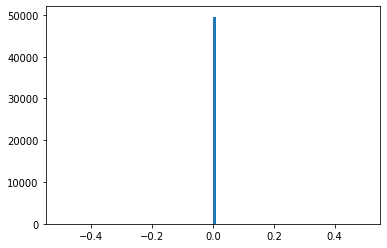

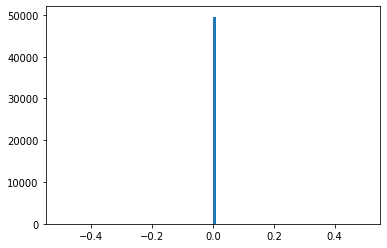

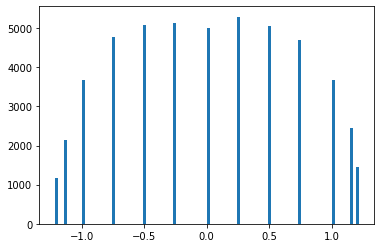

In [9]:
plt.hist(label[:,0],bins = 100)
plt.show()
plt.hist(label[:,1],bins = 100)
plt.show()

plt.hist(label[:,2],bins = 100)
plt.show()

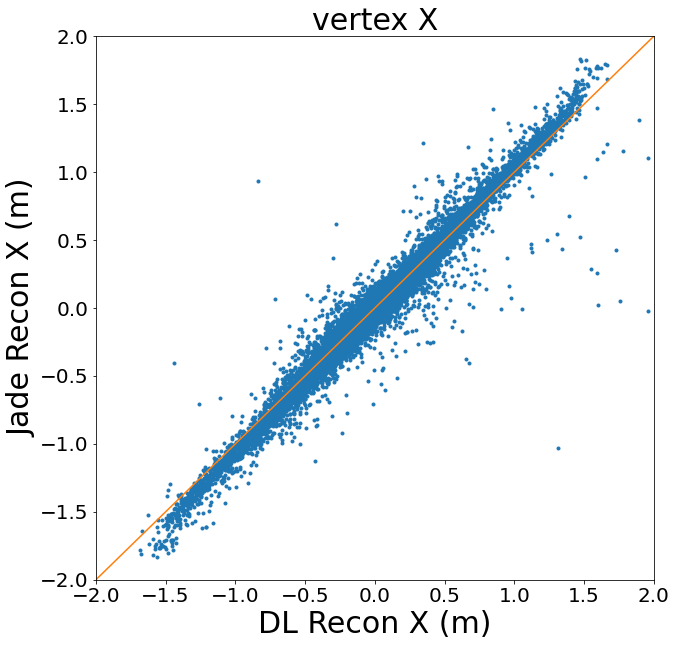

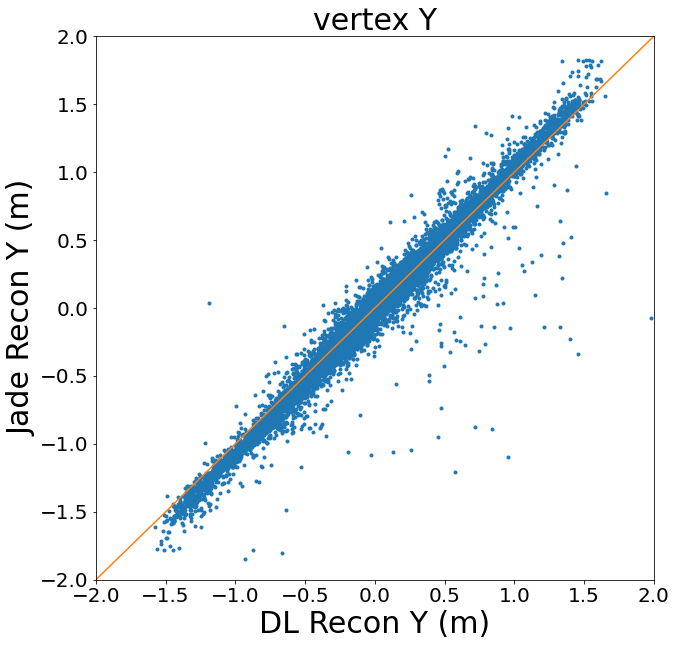

In [10]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(pred[:,0],jade[:,0],'.')
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('DL Recon X (m)',fontsize = 30)
plt.ylabel('Jade Recon X (m)',fontsize = 30)
plt.title('vertex X',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()





plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(pred[:,1],jade[:,1],'.')
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('DL Recon Y (m)',fontsize = 30)
plt.ylabel('Jade Recon Y (m)',fontsize = 30)
plt.title('vertex Y',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

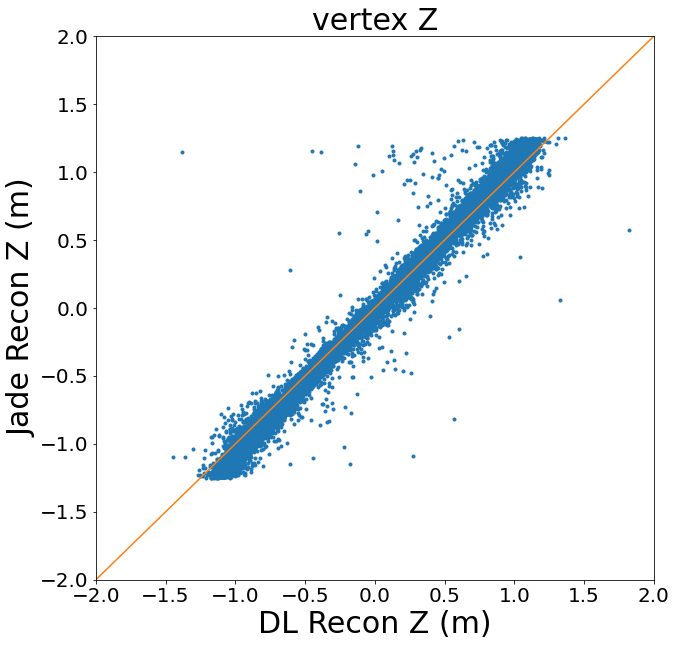

In [11]:

plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(pred[:,2],jade[:,2],'.')
plt.xlim([-2,2])
plt.ylim([-2,2])
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlabel('DL Recon Z (m)',fontsize = 30)
plt.ylabel('Jade Recon Z (m)',fontsize = 30)
plt.title('vertex Z',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()



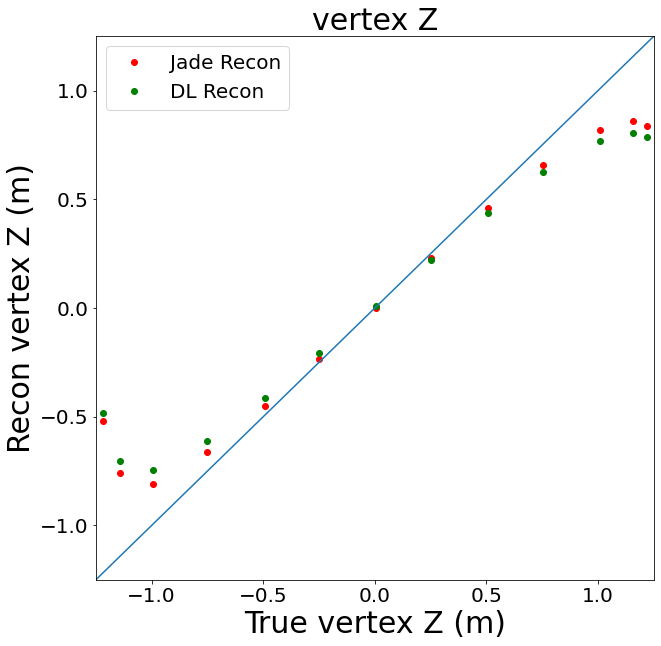

In [12]:

plt.rcParams['figure.figsize'] = (10, 10)

plt.plot(np.average(label[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)]),np.average(jade[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)]),'or',label='Jade Recon')
plt.plot(np.average(label[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)]),np.average(jade[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)]),np.average(jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)]),np.average(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)]),'or')

plt.plot(np.average(label[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)]),np.average(jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)]),np.average(jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)]),np.average(jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)]),np.average(jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)]),np.average(jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)]),'or')


plt.plot(np.average(label[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)]),np.average(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)]),np.average(jade[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)]),np.average(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)]),'or')
plt.plot(np.average(label[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)]),np.average(jade[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)]),'or')


plt.plot(np.average(label[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)]),np.average(pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)]),'og',label='DL Recon')
plt.plot(np.average(label[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)]),np.average(pred[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)]),np.average(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)]),np.average(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)]),'og')

plt.plot(np.average(label[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)]),np.average(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)]),np.average(pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)]),np.average(pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)]),np.average(pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)]),np.average(pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)]),'og')


plt.plot(np.average(label[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)]),np.average(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)]),np.average(pred[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)]),np.average(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)]),'og')
plt.plot(np.average(label[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)]),np.average(pred[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)]),'og')




plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])
x = [-1.25,1.25]
y = [-1.25,1.25]
plt.plot(x,y)
plt.xlabel('True vertex Z (m)',fontsize = 30)
plt.ylabel('Recon vertex Z (m)',fontsize = 30)
plt.title('vertex Z',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()









/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


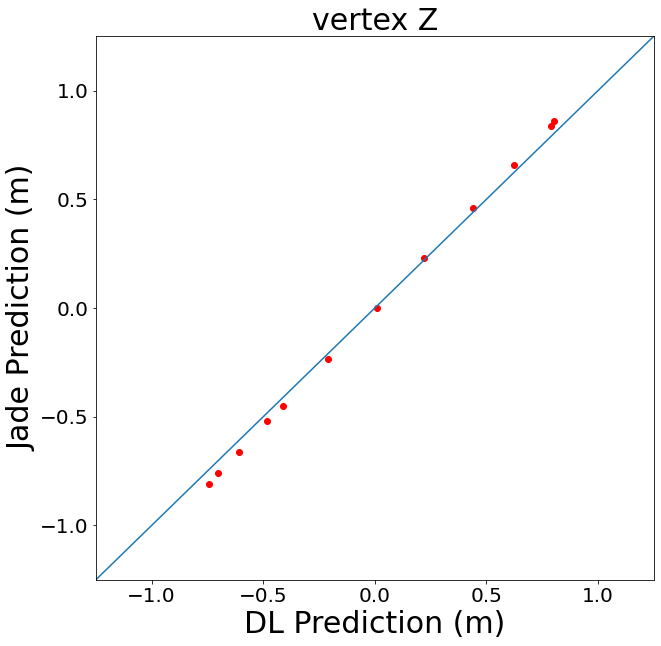

In [13]:

plt.rcParams['figure.figsize'] = (10, 10)

plt.plot(np.average(pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)]),np.average(jade[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)]),np.average(jade[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)]),np.average(jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)]),np.average(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)]),'or')

plt.plot(np.average(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)]),np.average(jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)]),np.average(jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)]),np.average(jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)]),np.average(jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)]),np.average(jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)]),'or')


plt.plot(np.average(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)]),np.average(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)]),np.average(jade[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)]),np.average(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)]),'or')
plt.plot(np.average(pred[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)]),np.average(jade[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)]),'or')

plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])
x = [-1.25,1.25]
y = [-1.25,1.25]
plt.plot(x,y)
plt.xlabel('DL Prediction (m)',fontsize = 30)
plt.ylabel('Jade Prediction (m)',fontsize = 30)
plt.title('vertex Z',fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()









In [14]:
pred

array([[-1.66703299e-01,  1.15944445e-03, -8.81588817e-01,
         9.25963306e+00],
       [ 1.47196814e-01,  1.33000761e-02,  4.42917138e-01,
         8.68444061e+00],
       [ 2.59818316e-01, -3.99114341e-02,  4.43833143e-01,
         9.74257278e+00],
       ...,
       [ 3.79406661e-02,  1.50500000e-01,  7.91514993e-01,
         8.89467335e+00],
       [-1.60910353e-01, -2.66710371e-01, -8.46500516e-01,
         8.10918903e+00],
       [ 7.32847601e-02,  2.40400627e-01,  1.77205622e-01,
         8.69274902e+00]])

In [15]:
jade 

array([[-1.95041701e-01, -2.79068407e-02, -9.14354324e-01,
         9.25963306e+00],
       [ 1.31698772e-01, -1.22973919e-02,  4.83026803e-01,
         8.68444061e+00],
       [ 3.12561840e-01, -8.27161372e-02,  4.88985062e-01,
         9.74257278e+00],
       ...,
       [-7.58126192e-03,  1.95289701e-01,  8.60088050e-01,
         8.89467335e+00],
       [-1.67972729e-01, -2.74187237e-01, -9.31379557e-01,
         8.10918903e+00],
       [ 5.97325712e-02,  1.96970686e-01,  1.50755152e-01,
         8.69274902e+00]])

In [16]:
label

array([[ 0.00000000e+00,  0.00000000e+00, -9.96000017e-01,
         9.25963306e+03],
       [ 0.00000000e+00,  0.00000000e+00,  5.08000026e-01,
         8.68444061e+03],
       [ 0.00000000e+00,  0.00000000e+00,  2.50999990e-01,
         9.74257278e+03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  7.51999964e-01,
         8.89467335e+03],
       [ 0.00000000e+00,  0.00000000e+00, -1.14199996e+00,
         8.10918903e+03],
       [ 0.00000000e+00,  0.00000000e+00,  2.50999990e-01,
         8.69274902e+03]])

In [17]:
jade[:,0].max()

1.8349080085754397

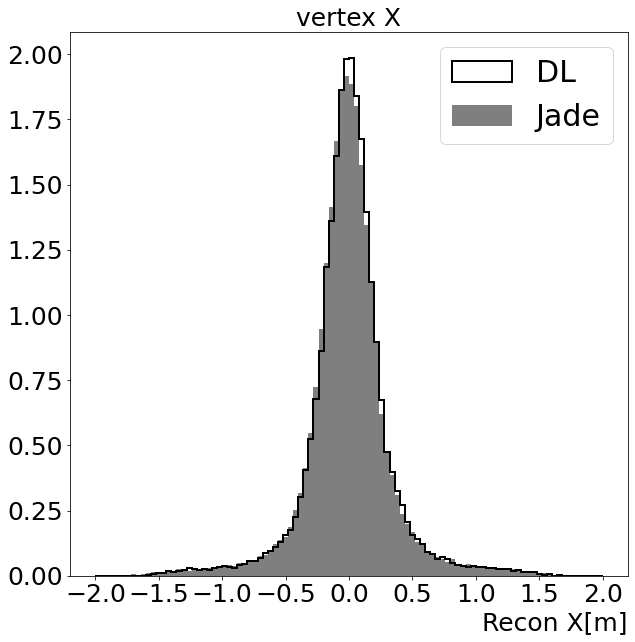

In [18]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.hist(pred[:,0], bins = 100, range = [-2.0,2.0],color= 'black', alpha = 1, density = True, histtype = 'step',label = 'DL',linewidth=2)
# 

plt.hist(jade[:,0], bins = 100, range = [-2.0,2.0], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'Jade')


# plt.hist(label[:,0]/1000, bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label')


# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertex X',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Recon X[m]", fontsize=25, loc='right')
plt.legend(loc='best',fontsize = 30)


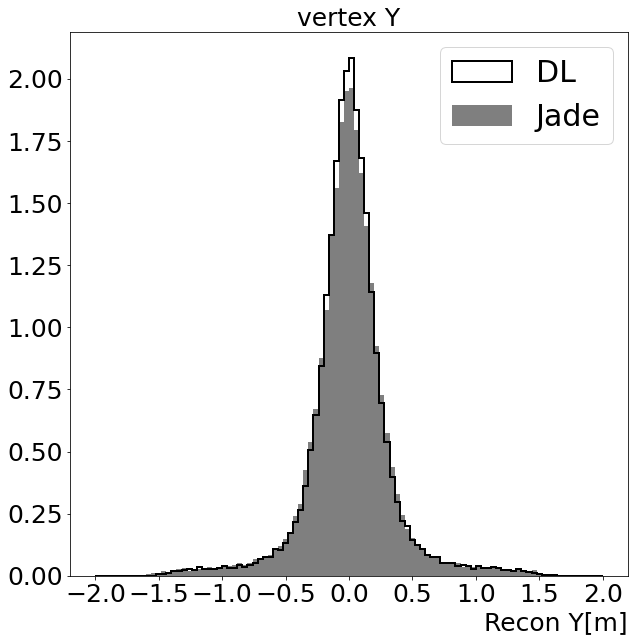

In [19]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.hist(pred[:,1], bins = 100, range = [-2.0,2.0], color= 'black', alpha = 1, density = True, histtype = 'step',label = 'DL',linewidth=2)


plt.hist(jade[:,1], bins = 100, range = [-2.0,2.0], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'Jade')


# plt.hist(label[:,1], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label')


plt.title('vertex Y',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Recon Y[m]", fontsize=25, loc='right')
plt.legend(loc='best',fontsize = 30)


Text(1, 0, 'Recon Z [m]')

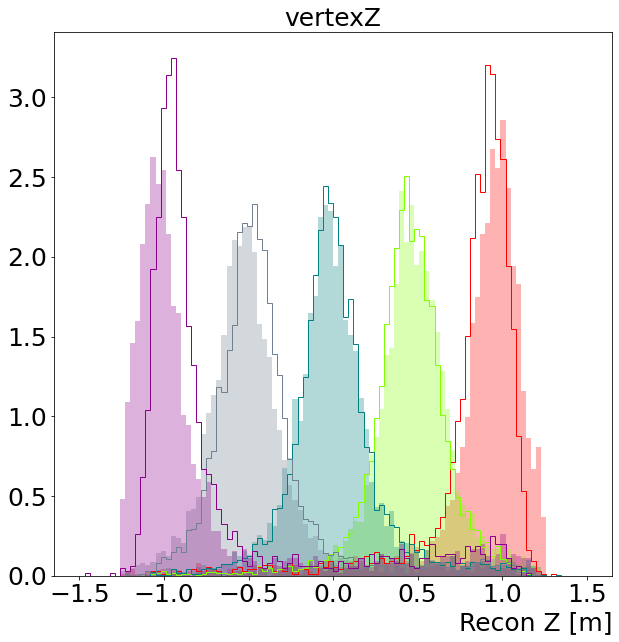

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.hist(pred[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 1, density = True, histtype = 'step',label = 'pred 1.156')
plt.hist(jade[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.3, density = True, histtype = 'stepfilled',label = 'jade 1.156')



# plt.hist(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 1, density = True, histtype = 'step',label = 'pred 0.752')
# plt.hist(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 0.3, density = True, histtype = 'stepfilled',label = 'jade 0.752')


plt.hist(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 1, density = True, histtype = 'step',label = 'pred 0.508')
plt.hist(jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 0.3, density = True, histtype = 'stepfilled',label = 'jade 0.508')

plt.hist(pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 1, density = True, histtype = 'step',label = 'pred 0.007')
plt.hist(jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 0.3, density = True, histtype = 'stepfilled',label = 'jade 0.007')


plt.hist(pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 1, density = True, histtype = 'step',label = 'pred -0.508')
plt.hist(jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 0.3, density = True, histtype = 'stepfilled',label = 'jade -0.508')


# plt.hist(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 1, density = True, histtype = 'step',label = 'pred -0.752')
# plt.hist(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 0.3, density = True, histtype = 'stepfilled',label = 'jade -0.752')


plt.hist(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 1, density = True, histtype = 'step',label = 'pred -1.156')
plt.hist(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.3, density = True, histtype = 'stepfilled',label = 'jade -1.156')




# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Recon Z [m]", fontsize=25, loc='right')


/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(1, 0, 'Recon Z [m]')

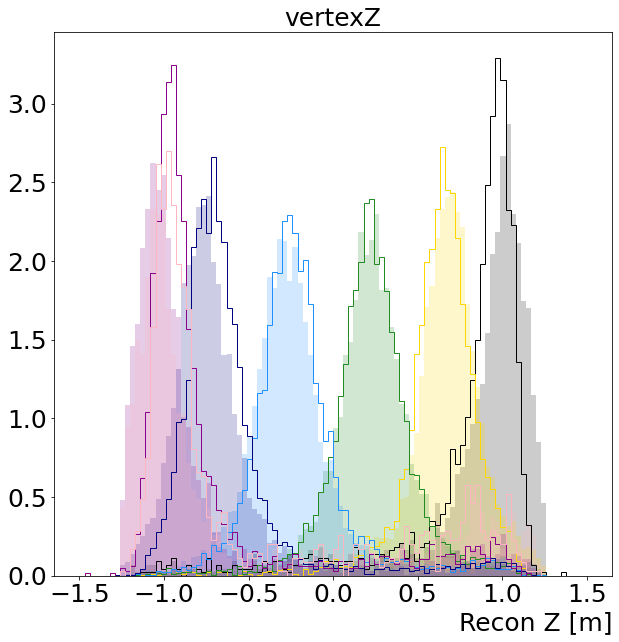

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.hist(pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 1, density = True, histtype = 'step',label = 'pred 1.218')
plt.hist(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 1, density = True, histtype = 'step',label = 'pred 1.010')
plt.hist(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 1, density = True, histtype = 'step',label = 'pred 0.752')


plt.hist(jade[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade 1.218')
plt.hist(jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade 1.010')
plt.hist(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade 0.752')


plt.hist(pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 1, density = True, histtype = 'step',label = 'pred 0.251')
plt.hist(pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 1, density = True, histtype = 'step',label = 'pred -0.251')

plt.hist(jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade 0.251')
plt.hist(jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade -0.251')



plt.hist(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 1, density = True, histtype = 'step',label = 'pred -0.752')
plt.hist(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 1, density = True, histtype = 'step',label = 'pred -1.156')
plt.hist(pred[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 1, density = True, histtype = 'step',label = 'pred -1.218')


plt.hist(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade -0.752')
plt.hist(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade -1.156')
plt.hist(jade[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 0.2, density = True, histtype = 'stepfilled',label = 'jade -1.218')




# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("Recon Z [m]", fontsize=25, loc='right')

/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


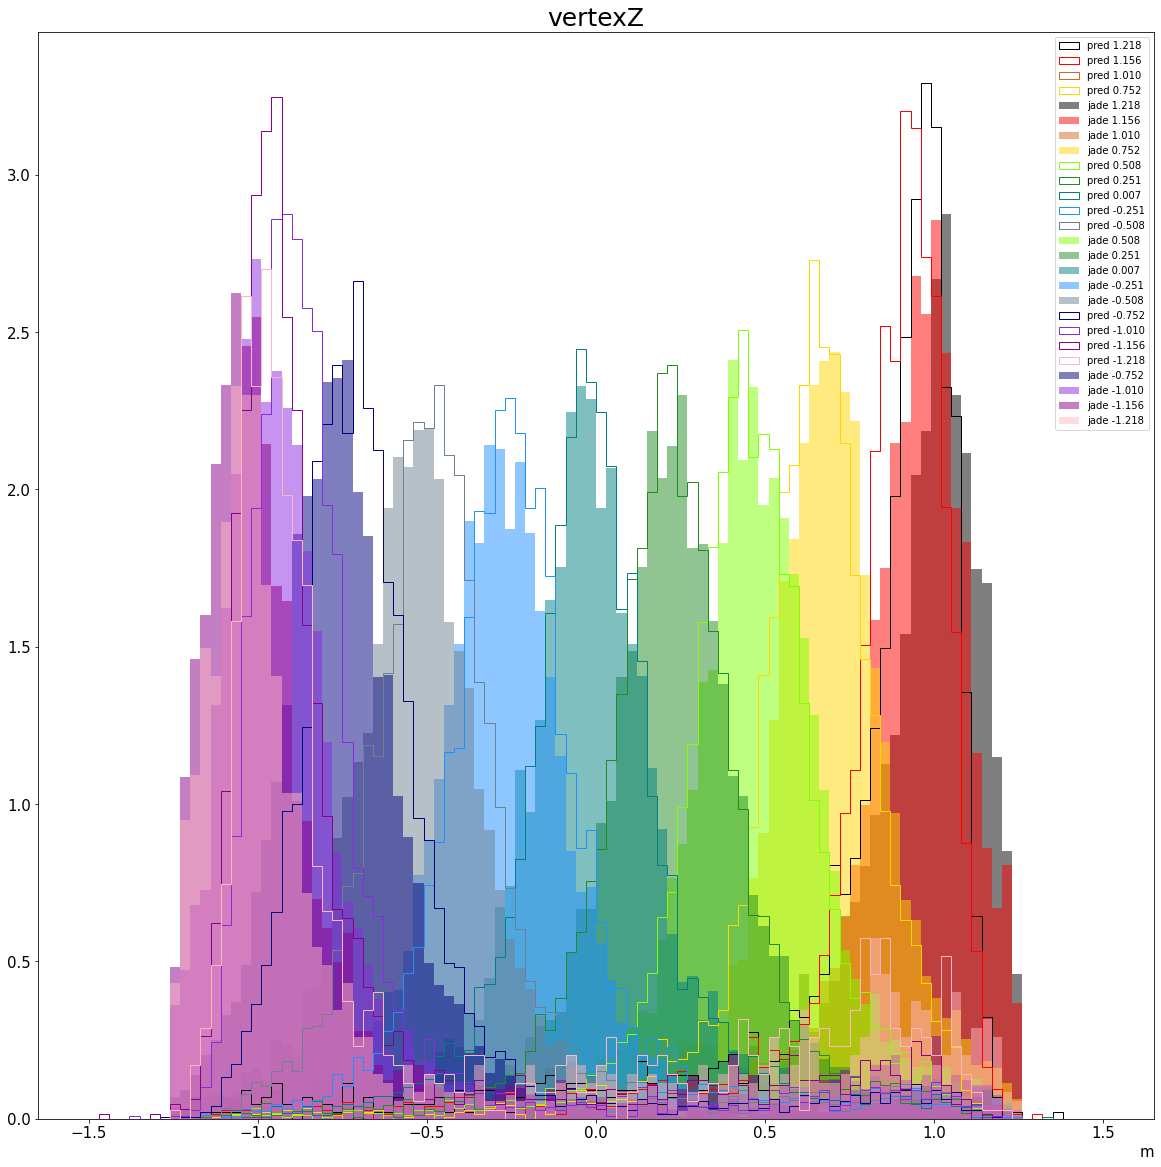

In [28]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.hist(pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 1, density = True, histtype = 'step',label = 'pred 1.218')
plt.hist(pred[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 1, density = True, histtype = 'step',label = 'pred 1.156')
plt.hist(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 1, density = True, histtype = 'step',label = 'pred 1.010')
plt.hist(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 1, density = True, histtype = 'step',label = 'pred 0.752')


plt.hist(jade[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.218')
plt.hist(jade[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.156')
plt.hist(jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.010')
plt.hist(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.752')



# plt.hist(label[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 1.218')
# plt.hist(label[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 1.156')
# plt.hist(label[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 1.010')
# plt.hist(label[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 0.752')
plt.hist(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 1, density = True, histtype = 'step',label = 'pred 0.508')
plt.hist(pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 1, density = True, histtype = 'step',label = 'pred 0.251')
plt.hist(pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 1, density = True, histtype = 'step',label = 'pred 0.007')
plt.hist(pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 1, density = True, histtype = 'step',label = 'pred -0.251')
plt.hist(pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 1, density = True, histtype = 'step',label = 'pred -0.508')


plt.hist(jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.508')
plt.hist(jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.251')
plt.hist(jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.007')
plt.hist(jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.251')
plt.hist(jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.508')




# plt.hist(label[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 0.508')
# plt.hist(label[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 0.251')
# plt.hist(label[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 0.007')
# plt.hist(label[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -0.251')
# plt.hist(label[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -0.508')


plt.hist(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 1, density = True, histtype = 'step',label = 'pred -0.752')
plt.hist(pred[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 1, density = True, histtype = 'step',label = 'pred -1.010')
plt.hist(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 1, density = True, histtype = 'step',label = 'pred -1.156')
plt.hist(pred[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 1, density = True, histtype = 'step',label = 'pred -1.218')


plt.hist(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.752')
plt.hist(jade[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.010')
plt.hist(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.156')
plt.hist(jade[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.218')





# plt.hist(label[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -0.752')
# plt.hist(label[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -1.010')
# plt.hist(label[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -1.156')
# plt.hist(label[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -1.218')



# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend(loc='best')


/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/users/yewzzang/.conda/envs/pytorch170_pyG/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


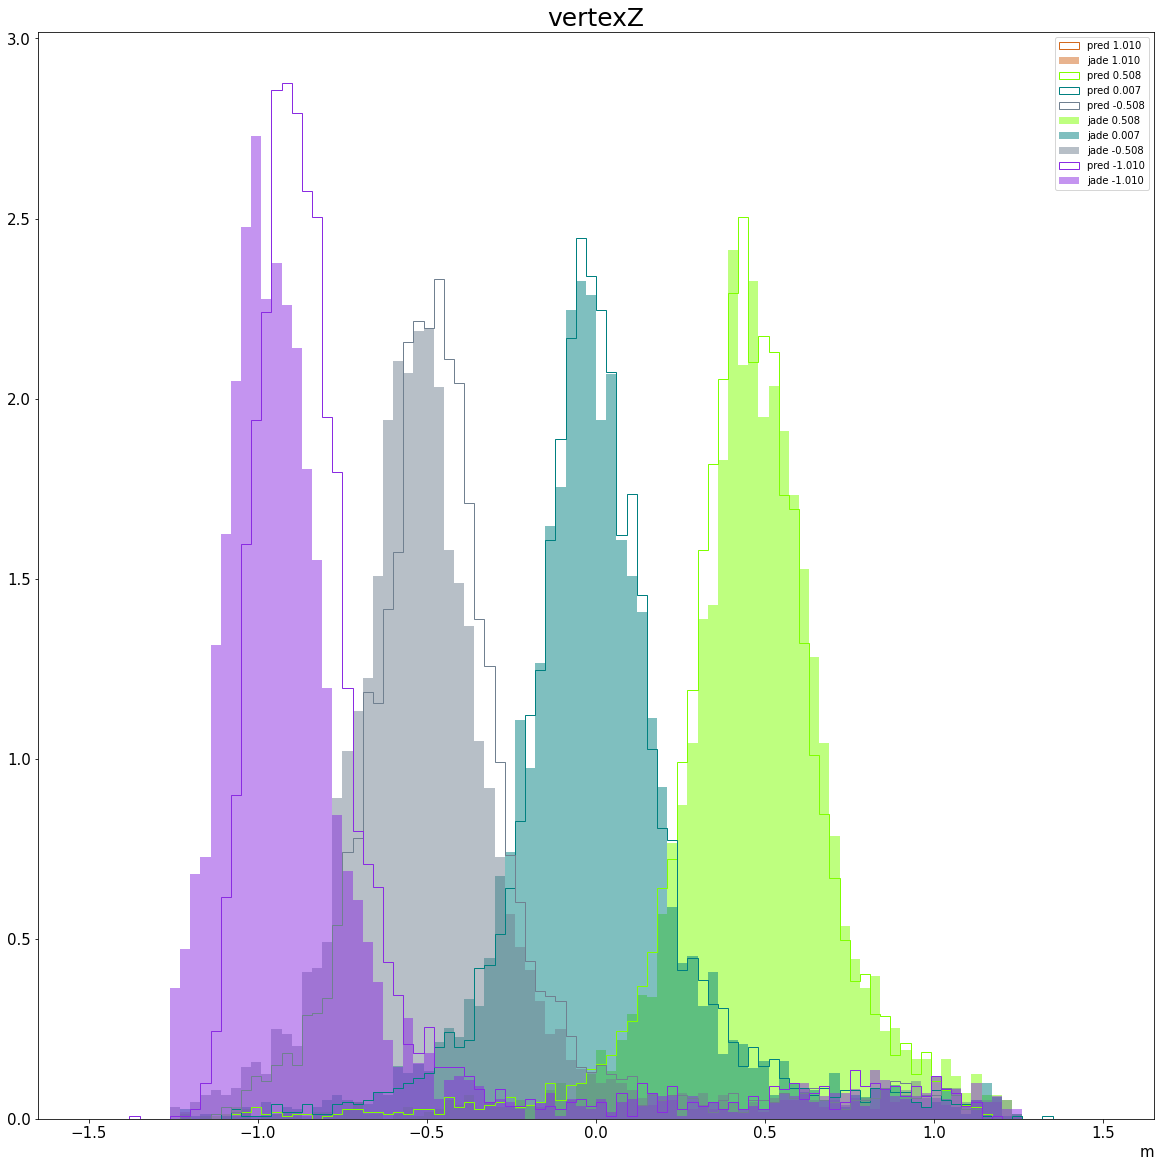

In [31]:
plt.rcParams['figure.figsize'] = (20, 20)
# plt.hist(pred[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 1, density = True, histtype = 'step',label = 'pred 1.156')
plt.hist(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 1, density = True, histtype = 'step',label = 'pred 1.010')
# plt.hist(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 1, density = True, histtype = 'step',label = 'pred 0.752')


# plt.hist(jade[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.156')
plt.hist(jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.010')
# plt.hist(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.752')

plt.hist(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 1, density = True, histtype = 'step',label = 'pred 0.508')
# plt.hist(pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 1, density = True, histtype = 'step',label = 'pred 0.251')
plt.hist(pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 1, density = True, histtype = 'step',label = 'pred 0.007')
# plt.hist(pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 1, density = True, histtype = 'step',label = 'pred -0.251')
plt.hist(pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 1, density = True, histtype = 'step',label = 'pred -0.508')


plt.hist(jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.508')
# plt.hist(jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.251')
plt.hist(jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.007')
# plt.hist(jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.251')
plt.hist(jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.508')




# plt.hist(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 1, density = True, histtype = 'step',label = 'pred -0.752')
plt.hist(pred[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 1, density = True, histtype = 'step',label = 'pred -1.010')
# plt.hist(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 1, density = True, histtype = 'step',label = 'pred -1.156')


# plt.hist(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.752')
plt.hist(jade[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.010')
# plt.hist(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.156')


plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend(loc='best')


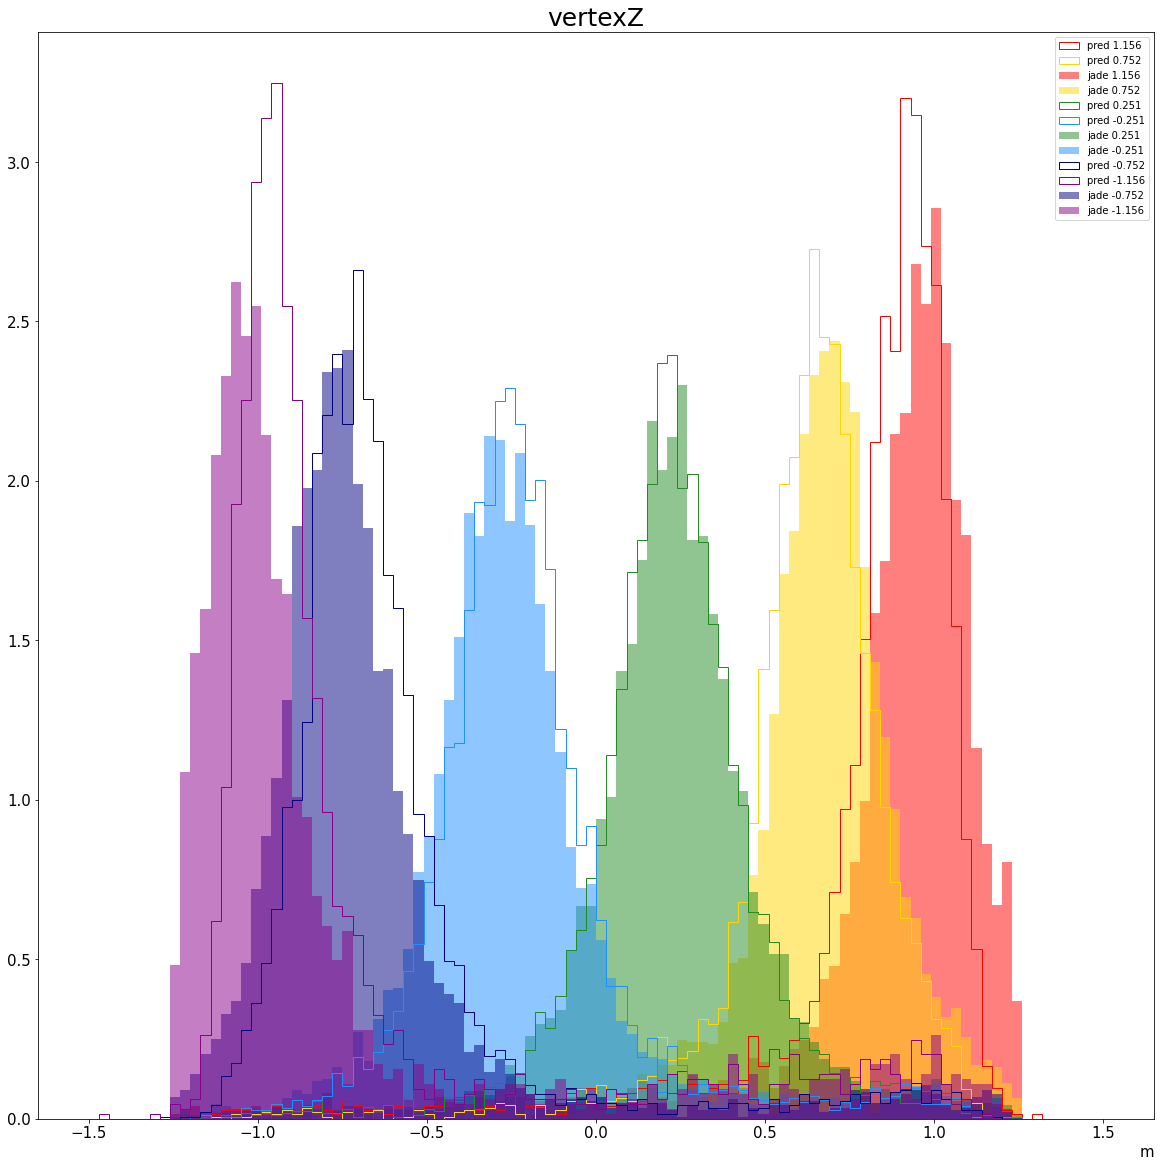

In [32]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.hist(pred[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 1, density = True, histtype = 'step',label = 'pred 1.156')
# plt.hist(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 1, density = True, histtype = 'step',label = 'pred 1.010')
plt.hist(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 1, density = True, histtype = 'step',label = 'pred 0.752')


plt.hist(jade[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.156')
# plt.hist(jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.01)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.010')
plt.hist(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.752')

# plt.hist(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 1, density = True, histtype = 'step',label = 'pred 0.508')
plt.hist(pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 1, density = True, histtype = 'step',label = 'pred 0.251')
# plt.hist(pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 1, density = True, histtype = 'step',label = 'pred 0.007')
plt.hist(pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 1, density = True, histtype = 'step',label = 'pred -0.251')
# plt.hist(pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 1, density = True, histtype = 'step',label = 'pred -0.508')


# plt.hist(jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.508')
plt.hist(jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.251')
# plt.hist(jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 0.007')
plt.hist(jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.251')
# plt.hist(jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.508')




plt.hist(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 1, density = True, histtype = 'step',label = 'pred -0.752')
# plt.hist(pred[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 1, density = True, histtype = 'step',label = 'pred -1.010')
plt.hist(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 1, density = True, histtype = 'step',label = 'pred -1.156')


plt.hist(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -0.752')
# plt.hist(jade[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.010')
plt.hist(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.156')


plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend(loc='best')


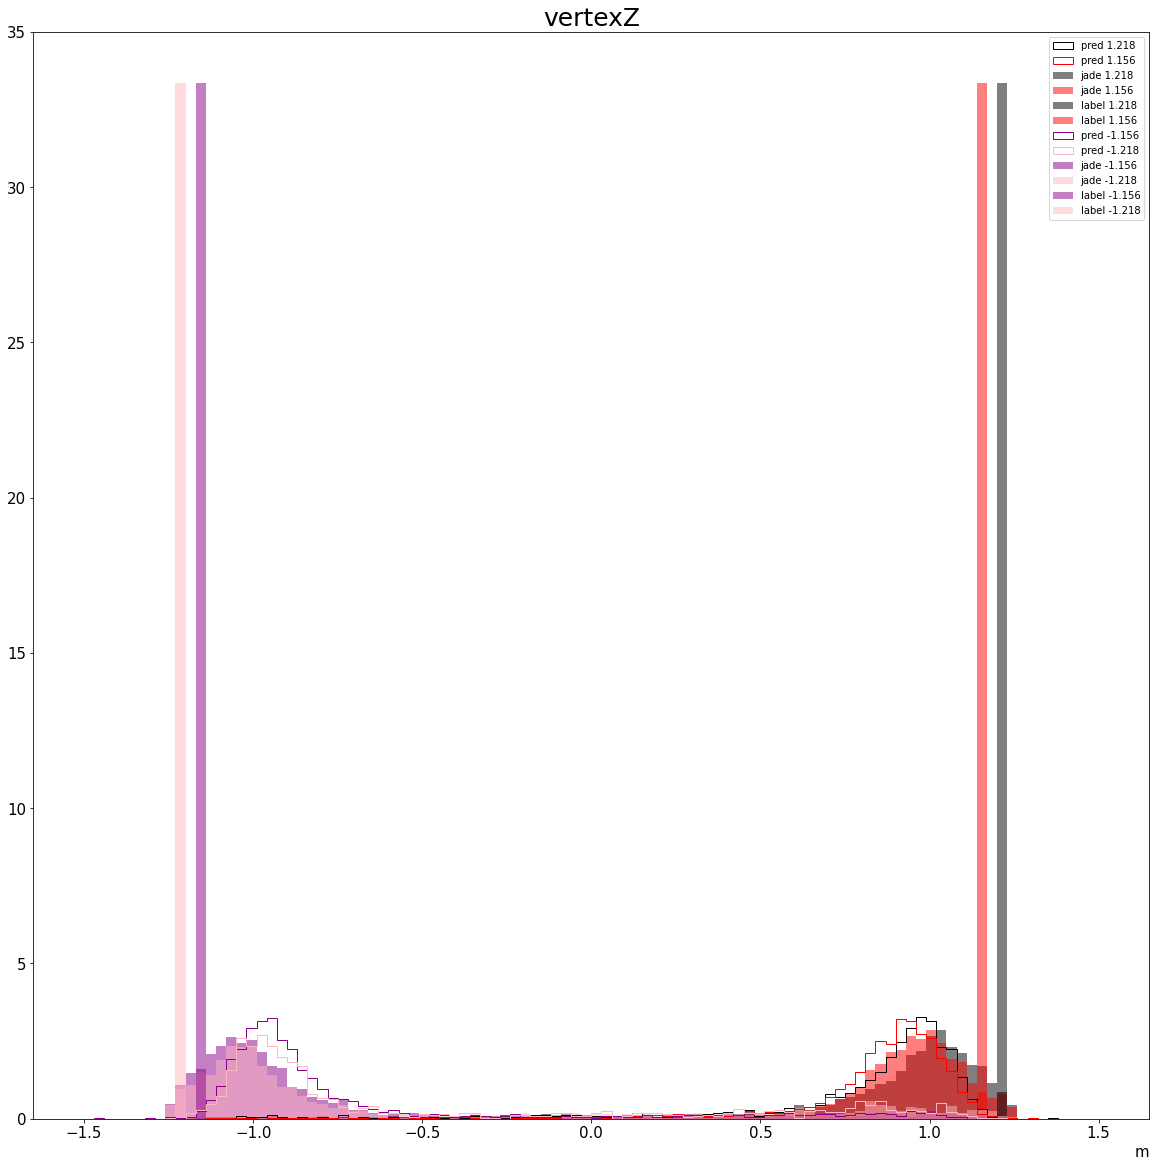

In [23]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.hist(pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 1, density = True, histtype = 'step',label = 'pred 1.218')
plt.hist(pred[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 1, density = True, histtype = 'step',label = 'pred 1.156')


plt.hist(jade[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.218')
plt.hist(jade[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade 1.156')


plt.hist(label[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 1.218')
plt.hist(label[:,2][(label[:,2]>1.15)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label 1.156')

plt.hist(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 1, density = True, histtype = 'step',label = 'pred -1.156')
plt.hist(pred[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 1, density = True, histtype = 'step',label = 'pred -1.218')


plt.hist(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.156')
plt.hist(jade[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'jade -1.218')





plt.hist(label[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -1.156')
plt.hist(label[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 0.5, density = True, histtype = 'stepfilled',label = 'label -1.218')



# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend(loc='best')


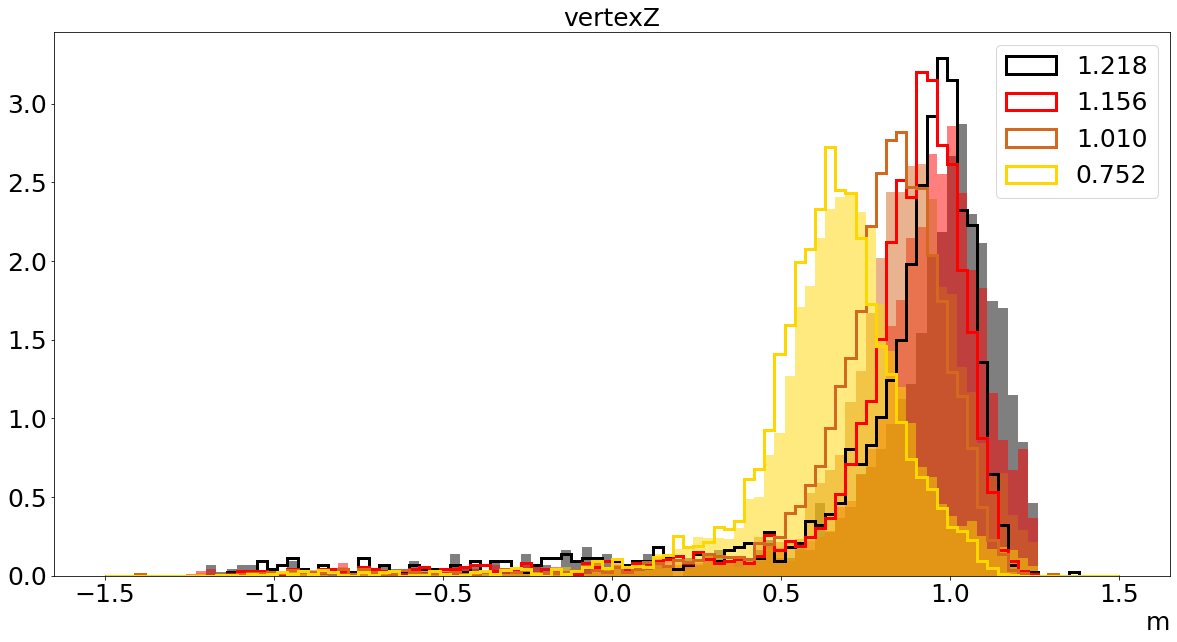

In [24]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.hist(pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 1, density = True, histtype = 'step',label = '1.218',linewidth=3)
plt.hist(pred[:,2][(label[:,2]>1.14)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 1, density = True, histtype = 'step',label = '1.156',linewidth=3)
plt.hist(pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 1, density = True, histtype = 'step',label = '1.010',linewidth=3)
plt.hist(pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 1, density = True, histtype = 'step',label = '0.752',linewidth=3)


plt.hist(jade[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], bins = 100, range = [-1.5,1.5], color= 'black', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]>1.14)&(label[:,2]<1.16)], bins = 100, range = [-1.5,1.5], color= 'red', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)], bins = 100, range = [-1.5,1.5], color= 'chocolate', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)], bins = 100, range = [-1.5,1.5], color= 'gold', alpha = 0.5, density = True, histtype = 'stepfilled')





# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("m", fontsize=25, loc='right')
plt.legend(loc='best',fontsize = 25)


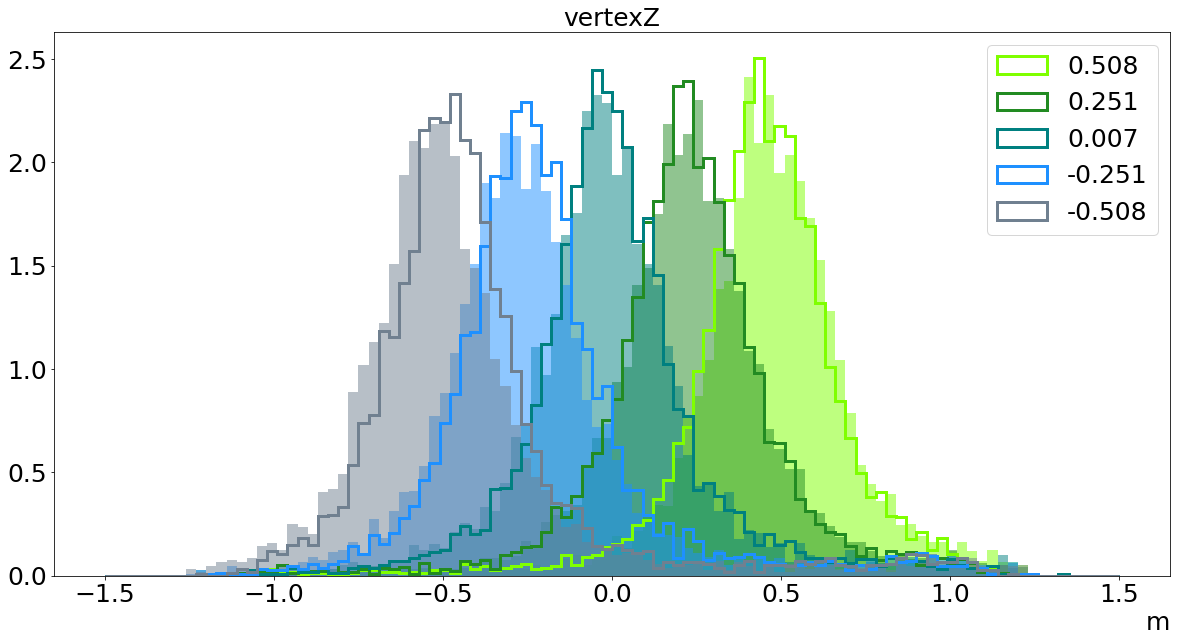

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.hist(pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 1, density = True, histtype = 'step',label = '0.508',linewidth=3)
plt.hist(pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 1, density = True, histtype = 'step',label = '0.251',linewidth=3)
plt.hist(pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 1, density = True, histtype = 'step',label = '0.007',linewidth=3)
plt.hist(pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 1, density = True, histtype = 'step',label = '-0.251',linewidth=3)
plt.hist(pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 1, density = True, histtype = 'step',label = '-0.508',linewidth=3)


plt.hist(jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)], bins = 100, range = [-1.5,1.5], color= 'chartreuse', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)], bins = 100, range = [-1.5,1.5], color= 'forestgreen', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)], bins = 100, range = [-1.5,1.5], color= 'teal', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)], bins = 100, range = [-1.5,1.5], color= 'dodgerblue', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)], bins = 100, range = [-1.5,1.5], color= 'slategray', alpha = 0.5, density = True, histtype = 'stepfilled')


# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("m", fontsize=25, loc='right')
plt.legend(loc='best',fontsize = 25)



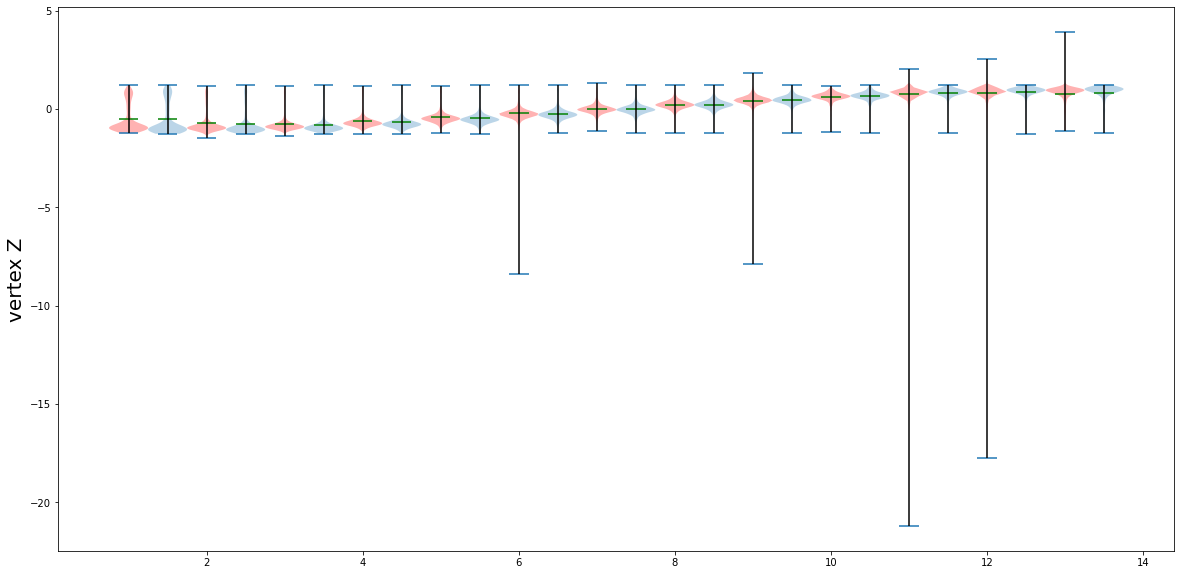

In [26]:
fig, ax = plt.subplots()

violin = ax.violinplot([pred[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], 
                pred[:,2][(label[:,2]>1.14)&(label[:,2]<1.16)], 
                pred[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)],
                pred[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)],
                pred[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)],
                pred[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)],
                pred[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)],
                pred[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)],
                pred[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)],
                pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)],
                pred[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)],
                pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)],
                pred[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)],
                
                jade[:,2][(label[:,2]>1.2)&(label[:,2]<1.22)], 
                jade[:,2][(label[:,2]>1.14)&(label[:,2]<1.16)], 
                jade[:,2][(label[:,2]>1.00)&(label[:,2]<1.02)],
                jade[:,2][(label[:,2]>0.75)&(label[:,2]<0.76)],
                jade[:,2][(label[:,2]>0.50)&(label[:,2]<0.51)],
                jade[:,2][(label[:,2]>0.25)&(label[:,2]<0.26)],
                jade[:,2][(label[:,2]<0.08)&(label[:,2]>0.00)],
                jade[:,2][(label[:,2]<-0.24)&(label[:,2]>-0.25)],
                jade[:,2][(label[:,2]<-0.49)&(label[:,2]>-0.50)],
                jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)],
                jade[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)],
                jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)],
                jade[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)]
               ], 
                       positions = [13,12,11,10,9,8,7,6,5,4,3,2,1,13.5,12.5,11.5,10.5,9.5,8.5,7.5,6.5,5.5,4.5,3.5,2.5,1.5]
              , showmeans=True)
violin['bodies'][0].set_facecolor('red')
violin['bodies'][1].set_facecolor('red')
violin['bodies'][2].set_facecolor('red')
violin['bodies'][3].set_facecolor('red')
violin['bodies'][4].set_facecolor('red')
violin['bodies'][5].set_facecolor('red')
violin['bodies'][6].set_facecolor('red')
violin['bodies'][7].set_facecolor('red')
violin['bodies'][8].set_facecolor('red')
violin['bodies'][9].set_facecolor('red')
violin['bodies'][10].set_facecolor('red')
violin['bodies'][11].set_facecolor('red')
violin['bodies'][12].set_facecolor('red')
violin['cmeans'].set_edgecolor('green')
violin['cbars'].set_edgecolor('black')
ax.set_ylabel('vertex Z', fontsize = 20)


plt.show()

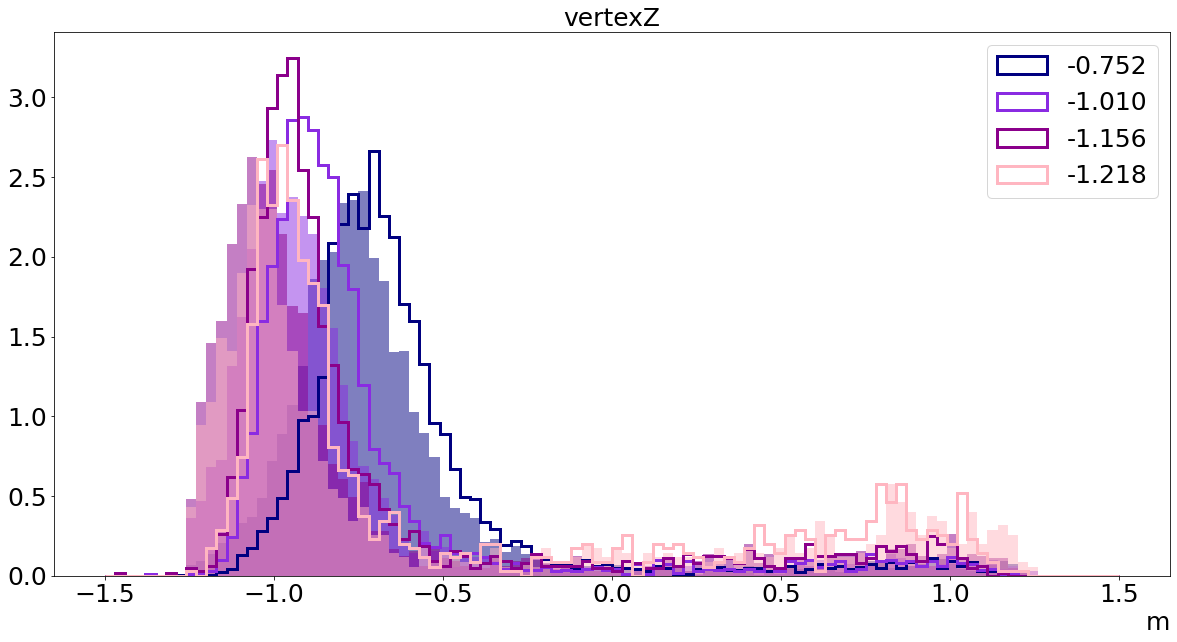

In [27]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.hist(pred[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 1, density = True, histtype = 'step',label = '-0.752',linewidth=3)
plt.hist(pred[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 1, density = True, histtype = 'step',label = '-1.010',linewidth=3)
plt.hist(pred[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 1, density = True, histtype = 'step',label = '-1.156',linewidth=3)
plt.hist(pred[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 1, density = True, histtype = 'step',label = '-1.218',linewidth=3)


plt.hist(jade[:,2][(label[:,2]<-0.75)&(label[:,2]>-0.76)], bins = 100, range = [-1.5,1.5], color= 'navy', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]<-0.90)&(label[:,2]>-1.01)], bins = 100, range = [-1.5,1.5], color= 'blueviolet', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]<-1.14)&(label[:,2]>-1.15)], bins = 100, range = [-1.5,1.5], color= 'darkmagenta', alpha = 0.5, density = True, histtype = 'stepfilled')
plt.hist(jade[:,2][(label[:,2]<-1.2)&(label[:,2]>-1.22)], bins = 100, range = [-1.5,1.5], color= 'lightpink', alpha = 0.5, density = True, histtype = 'stepfilled')







# plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 1, density = True, histtype = 'step',label = 'target')
plt.title('vertexZ',fontsize = 25)
# plt.xlim([-3,3])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel("m", fontsize=25, loc='right')
plt.legend(loc='best',fontsize = 25)

